In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers.legacy import Adam

In [2]:
train_data_path = '.\\New folder'
test_data_path = '.\\test'

In [3]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
seed=123
CHANNELS=3
EPOCHS=50

In [4]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel values to be between 0 and 1
#     shear_range=0.2,  # Shear transformations
#     zoom_range=0.2,  # Zoom transformations
#     horizontal_flip=True  # Horizontal flips
# )

In [5]:
# train_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 288 files belonging to 2 classes.


In [7]:
class_names = train_set.class_names
n_clls=len(class_names)

In [8]:
for image_batch, labels_batch in train_set.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1]


In [9]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 449 files belonging to 2 classes.


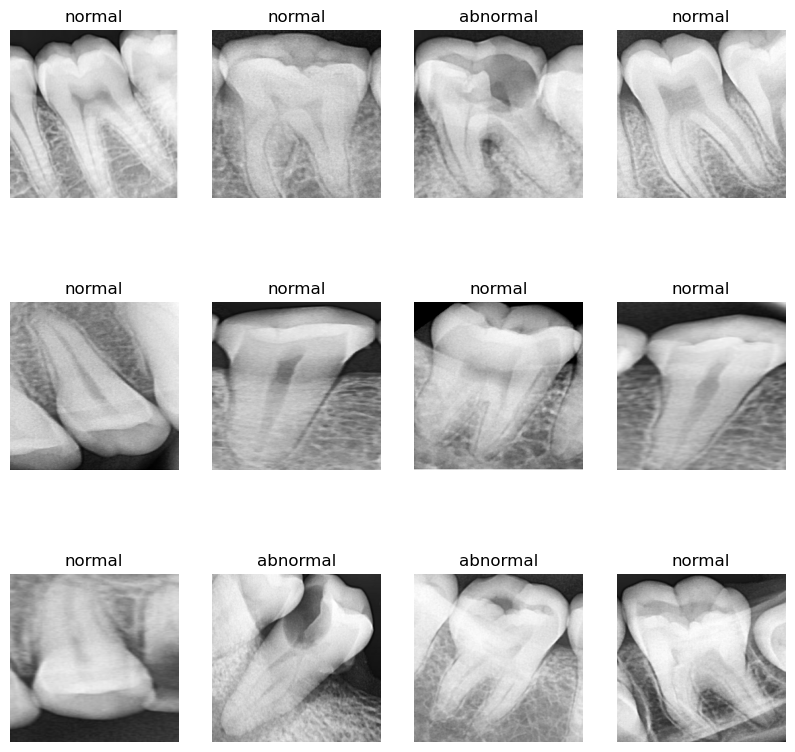

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in test_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
    plt.show()    

In [12]:
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
train_set = train_set.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(256,256,3)))

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_clls,activation='softmax'),
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (16, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [1]:
history = model.fit(
    train_set,
    batch_size=BATCH_SIZE,
    validation_data=test_set,
    verbose=1,
    epochs=30
)

NameError: name 'model' is not defined

In [21]:
scores = model.evaluate(test_set)


29/29 [==============================] - 7s 257ms/step - loss: 0.4011 - accuracy: 0.8196


In [22]:
scores

[0.5568856000900269, 0.7728285193443298]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 9}